<a href="https://colab.research.google.com/github/DevanshD3/Quant-Wing-2020/blob/master/Simple%20Trading%20Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as data
import numpy as np


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# style.use('ggplot')
# start = dt.datetime(2020,6,1)
# end = dt.datetime(2020,6,12)

# df = web.DataReader('YESBANK.NS', 'yahoo', start , end )
# df

Strategy used : If RSI is less than 30 then buy , more than 70 toh sell and if in between toh hold.
(I am learning ways to implement ML models toh wo baad mein daal dunga improve karne ke liye)

In [37]:
portfolio = 1000 #this is the initial money that we have with us
# start = dt.datetime(2020,1,1) ##yyyy,mm,dd
# end = dt.datetime(2020,7,7)
days = 750

# this is the period for we are checking  out strategy
stock_list = ['RELIANCE.NS']
prices=read_data(stock_list, days)
print(prices)
# days = len(prices)
# len(prices.tail(days-14).index)
nav = pd.DataFrame(index = prices.tail(days-14).index) #accountbook for transactions XD and rsi works for 14 days so we start trading from 22jan
nav = nav.assign(leftover = np.zeros(days-14), stock = np.zeros(days-14))
nav.iloc[0,0] = portfolio
nav


            RELIANCE.NS
Date                   
2010-01-04   457.306488
2010-01-05   455.265503
2010-01-06   462.621460
2010-01-07   470.296417
2010-01-08   469.063354
...                 ...
2013-01-07   384.839020
2013-01-08   382.165985
2013-01-09   383.086975
2013-01-10   381.896393
2013-01-11   377.336395

[750 rows x 1 columns]


,leftover,stock
Date,,
2010-01-22,1000.0,0.0
2010-01-25,0.0,0.0
2010-01-27,0.0,0.0
2010-01-28,0.0,0.0
2010-01-29,0.0,0.0
...,...,...
2013-01-07,0.0,0.0
2013-01-08,0.0,0.0
2013-01-09,0.0,0.0


In [41]:
signal = 0 #this shows the current signal
prev_signal = 0 #this shows yesterday's signal
for index, row in nav.iloc[1:].iterrows():
  signal = np.sign(signal + RSI(prices.loc[:index].tail(14)))
  leftover = nav.loc[:index].tail(2).head(1).iloc[0,0]

  if(signal == -1):
    nav.loc[index, 'leftover'] = leftover
    nav.loc[index, 'stock'] = 0
    continue

  if(prev_signal == 0 and signal == 1):
    #BUY
    nav.loc[index, 'leftover'] = leftover -  prices.loc[index][0]
    nav.loc[index, 'stock'] = prices.loc[index][0]

  if(prev_signal == 1 and signal == 1):
    #HOLD   you can also ask the algorithm to buy more stocks but since you don't have money so you need to hold
    nav.loc[index, 'leftover'] = leftover
    nav.loc[index, 'stock'] = prices.loc[index][0]
  
  if(prev_signal == 1 and signal == 0):
    #SELL
    nav.loc[index, 'leftover'] = leftover +  prices.loc[index][0]
    nav.loc[index, 'stock'] = 0

  if(prev_signal == 0 and signal == 0):
    #WAIT
    nav.loc[index, 'leftover'] = leftover
    nav.loc[index, 'stock'] = 0
  
  prev_signal = signal

In [42]:
nav
#we made a net profit of 128 rupees

,leftover,stock
Date,,
2010-01-22,1000.000000,0.000000
2010-01-25,1000.000000,0.000000
2010-01-27,563.082031,436.917969
2010-01-28,563.082031,440.999939
2010-01-29,563.082031,444.847931
...,...,...
2013-01-07,1128.296204,0.000000
2013-01-08,1128.296204,0.000000
2013-01-09,1128.296204,0.000000


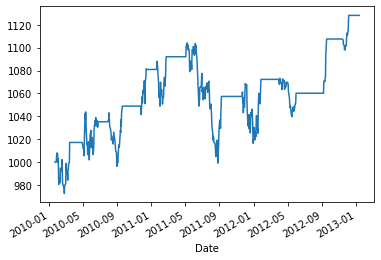

In [43]:
nav.sum(axis=1).plot()

In [29]:
def read_data(stock_list, days):
  df = pd.DataFrame()
  for ticker in stock_list:
    df[ticker] = data.DataReader(ticker,'yahoo',start='1/1/2010')['Adj Close']
  return df.head(days)

In [30]:

# def BollBnd(Df,n):
#     df = Df.copy()
    
#     df['MA'] = df['Adj Close'].rolling(n).mean()
#     df['BB_up'] = df['Adj Close'].rolling(n).mean() + 2*df['MA'].rolling(n).std()
#     df['BB_dn'] = df['Adj Close'].rolling(n).mean() - 2*df['MA'].rolling(n).std()
#     df['BB_Width'] = df['BB_up'] - df['BB_dn']
#     df.dropna(inplace=True)
#     return df

In [40]:
def RSI(price_data):
  delta = price_data.diff()
  up, down = delta.copy(), delta.copy()
  up[up < 0] = 0
  down[down > 0] = 0
  
  roll_up = up.mean()
  roll_down = down.abs().mean()

  RS = roll_up / roll_down
  RSI = (100.0 - (100.0 / (1.0 + RS)))[0]
  
  if(RSI > 70): return -1
  elif(RSI < 30): return 1
  else: return 0